In [1]:
import pickle

In [2]:
with open('scaled_data.pkl', 'rb') as file:
    scaled_data = pickle.load(file)

# Access the data
x_train_scaled_loaded = scaled_data['x_train_scaled']
x_test_scaled_loaded = scaled_data['x_test_scaled']
y_train_scaled_loaded = scaled_data['y_train_scaled']
y_test_scaled_loaded = scaled_data['y_test_scaled']

print("Scaled data loaded successfully")

Scaled data loaded successfully


In [3]:
x_train_scaled_loaded

array([[1.        , 0.46118941, 0.14378815, 0.29962821, 0.50003995],
       [0.        , 0.39689643, 0.46997546, 0.69147931, 0.55852758],
       [1.        , 0.45390883, 0.44375484, 0.30303041, 0.41478443],
       ...,
       [0.        , 0.69544641, 0.58857692, 0.15043757, 0.71839328],
       [0.        , 0.48707233, 0.35272824, 0.52070265, 0.23385998],
       [0.        , 0.25592997, 0.8157264 , 0.53842106, 0.47506504]])

In [4]:
x_train_scaled_loaded.shape

(350, 5)

In [5]:
y_train_scaled_loaded.shape

(350, 1)

In [6]:
y_test_scaled_loaded.shape

(150, 1)

In [7]:
x_test_scaled_loaded.shape

(150, 5)

In [8]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [9]:
model = Sequential()

In [10]:
model.add(Dense(40, input_dim = 5, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1,activation='linear'))

/Users/parthabhang/Desktop/DL/Car price prediction/carenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [13]:
history = model.fit(x_train_scaled_loaded, y_train_scaled_loaded,epochs=50, batch_size = 20, verbose = 1, validation_split = 0.2)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1517 - mae: 0.3580 - val_loss: 0.0359 - val_mae: 0.1548
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260 - mae: 0.1315 - val_loss: 0.0152 - val_mae: 0.0989
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - mae: 0.0980 - val_loss: 0.0082 - val_mae: 0.0679
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074 - mae: 0.0662 - val_loss: 0.0061 - val_mae: 0.0595
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - mae: 0.0621 - val_loss: 0.0051 - val_mae: 0.0522
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - mae: 0.0573 - val_loss: 0.0045 - val_mae: 0.0493
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - mae: 0.0495 - val_loss: 0.0041 - val_mae: 0.0463
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - mae: 0.0474 - val_loss: 0.0038 - val_mae: 0.0434
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - mae: 

In [14]:
model.save('model.h5')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

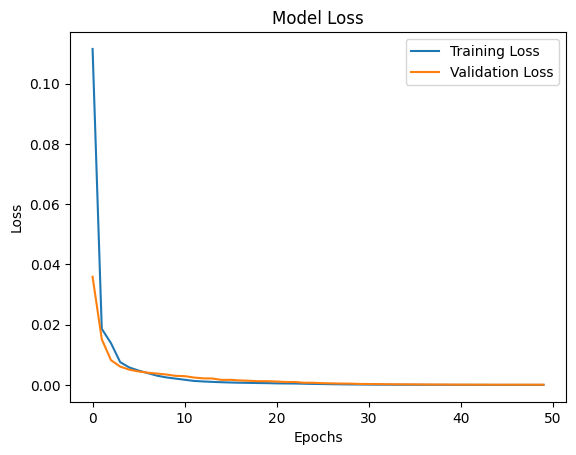

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()